In [107]:
from Bio import SeqIO
import yaml
import pandas as pd
import re

from scipy.stats import chisquare, chi2_contingency, power_divergence
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
def isolate_patient_id_number(complete_id : str) -> int:
    return int(re.sub('[AB]0+(\d+)-.*',r'\1', complete_id))

In [3]:
# Load metadata and neurocog impairment
neuro = pd.read_csv("../Data/PatientMetadata/DD_neuro_2021_06_14-05_scaled.csv", index_col = 0)
fullneuro = pd.read_csv("../Data/PatientMetadata/fullneuro_2021-09-04.csv")

In [4]:
id_and_date_to_full_id = {(study_id, date) : full_id for study_id, date, full_id in zip(fullneuro['study_id'],fullneuro['date_of_visit'],fullneuro['closest_visit'])}
id_and_date_to_full_id

{(1, '2014-11-10'): 'A0001-R09',
 (1, '2018-01-09'): 'B0001-R03',
 (2, '2013-10-22'): 'A0002-R11',
 (2, '2018-03-13'): 'B0002-R02',
 (2, '2021-03-11'): 'B0002-R05',
 (4, '2014-11-10'): 'A0004-R10',
 (5, '2013-12-12'): 'A0005-R05',
 (5, '2020-11-19'): 'B0005-R04',
 (8, '2014-08-05'): 'A0008-R07',
 (8, '2017-11-28'): 'B0008-R02',
 (10, '2014-11-12'): 'A0010-R08',
 (10, '2017-12-05'): 'B0010-R03',
 (12, '2014-09-22'): 'A0012-R02',
 (12, '2017-10-31'): 'B0012-R01',
 (13, '2014-11-10'): 'A0013-R09',
 (13, '2018-03-13'): 'B0013-R04',
 (13, '2021-02-25'): 'B0013-R07',
 (15, '2013-10-22'): 'A0015-R10',
 (17, '2013-10-22'): 'A0017-R09',
 (17, '2014-08-07'): 'A0017-R10',
 (18, '2014-11-13'): 'A0018-R02',
 (19, '2015-02-02'): 'A0019-R12',
 (25, '2014-08-07'): 'A0025-R08',
 (25, '2018-03-06'): 'B0025-R02',
 (25, '2021-03-16'): 'B0025-R05',
 (26, '2015-04-30'): 'A0026-R09',
 (26, '2018-04-17'): 'B0026-R03',
 (26, '2021-04-28'): 'B0026-R06',
 (32, '2015-02-05'): 'A0032-R05',
 (32, '2017-12-12'): 'B0

In [5]:
neuro['closest_visit'] = [id_and_date_to_full_id[i] for i in zip(neuro.index, neuro.date_of_visit)]
neuro

,date_of_visit,age,cnns_hdiscrim_t,cnns_hretain_t,cnns_hvlt4_t,cnns_hvlt_t,hvlt1intr,hvlt1pers,hvlt2pers,hvlt_delay,...,cnns_swords_z,cnns_anwords_z,cnns_bnt30_z,language_domain_z,language_domain_deficit,race_desc,global_score_z,gds,impaired,closest_visit
study_id,,,,,,,,,,,,,,,,,,,,,
2,2021-03-11,70.0,27.0,39.0,42.0,35.0,0.0,0.0,0.0,3.0,...,-0.6,0.2,0.5,0.300000,0.0,AA,-0.910417,1.250,1.0,B0002-R05
5,2020-11-19,61.0,25.0,62.0,43.0,40.0,0.0,0.0,0.0,5.0,...,0.1,1.3,2.3,1.333333,0.0,AA,-0.293763,0.250,0.0,B0005-R04
13,2021-02-25,75.0,38.0,64.0,49.0,29.0,1.0,0.0,1.0,6.0,...,-1.5,-0.5,1.9,0.400000,0.0,AA,-0.790278,0.625,1.0,B0013-R07
25,2021-03-16,63.0,36.0,51.0,41.0,40.0,0.0,1.0,0.0,5.0,...,-1.3,1.0,-0.8,-0.300000,0.0,AA,-0.892701,0.375,0.0,B0025-R05
26,2021-04-28,61.0,35.0,43.0,35.0,31.0,0.0,1.0,0.0,4.0,...,-1.1,-1.2,1.1,-0.100000,0.0,AA,-0.601586,0.250,0.0,B0026-R06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,2021-02-09,44.0,60.0,61.0,59.0,56.0,0.0,1.0,2.0,9.0,...,0.2,2.2,2.1,1.400000,0.0,AA,0.872855,0.000,0.0,B0761-R00
762,2021-03-03,58.0,22.0,32.0,30.0,57.0,0.0,0.0,0.0,1.0,...,-1.5,-0.5,-1.0,-0.733333,0.0,AA,-1.029026,1.000,1.0,B0762-R00
763,2021-03-04,65.0,22.0,36.0,33.0,34.0,3.0,0.0,0.0,5.0,...,-1.5,0.7,0.0,0.133333,0.0,white,-0.692933,0.750,1.0,B0763-R00


1. motor skills
groovedpegdom_heaton_z
groovedpegnondom_heaton_z

2. processing speed/executive function
traila_heaton_z
trailb_heaton_z

3. verbal fluency
categoryfluency_total_heaton_z
letterfluencyfas_total_heaton_z

4. visuoconstruction
cnns_reyo_z

5. episodic memory
bvmt_immediate_heaton_z
bvmt_delay_heaton_z

In [124]:
with open("../Data/CARESInteractionResults/Patient_maintains_WT_interaction.yml") as datafile:
    interactions = {key : int(value['Maintains interaction']) for key,value in yaml.load(datafile, Loader = yaml.FullLoader).items()}

interactions_patient = {isolate_patient_id_number(key) : value for key,value in interactions.items()}

# Each patient has only one visit
print(f"""Total number of patients: {len(interactions.keys())}""") # Number of unique patients: {len(set([isolate_patient_id_number(key) for key in interactions.keys()]))}""")

Total number of patients: 296


In [7]:
with open('../Data/CohortTats/Sanger/Sanger_Unambiguous_Trimmed_Normal_Tats.fasta') as handle:
    patient_tats = {record.id: " ".join(record.seq) for record in SeqIO.parse(handle, "fasta")}
    
with open("../Data/CohortTats/PacBio/PacBio_Trimmed_Normal_Tats.fasta") as handle:
    pacbio_tats = {record.id.split('_')[0] : str(record.seq) for record in SeqIO.parse(handle, 'fasta')}
    
patient_tats.update(pacbio_tats)
patient_study_id_tats = {isolate_patient_id_number(patient_id) : seq for patient_id, seq in patient_tats.items()}



In [8]:
impaired_w_seq = neuro[neuro.index.isin(patient_study_id_tats.keys())]

In [19]:
DOMAIN_TESTS = {'motor skills' : ('groovedpegdom_heaton_z', 'groovedpegnondom_heaton_z'), 
                'processing speed/executive function' : ('traila_heaton_z','trailb_heaton_z'), 
                'verbal fluency' : ('categoryfluency_total_heaton_z','letterfluencyfas_total_heaton_z'), 
                'visuoconstruction' : ('cnns_reyo_z'), 
                'episodic memory' : ('bvmt_immediate_heaton_z','bvmt_delay_heaton_z')}

In [23]:
IMPAIRMENT_TESTS = list()

for key in DOMAIN_TESTS.keys():
    if type(DOMAIN_TESTS[key]) == tuple:
        IMPAIRMENT_TESTS.extend(DOMAIN_TESTS[key])
    else:
        IMPAIRMENT_TESTS.append(DOMAIN_TESTS[key])

IMPAIRMENT_TESTS

['groovedpegdom_heaton_z',
 'groovedpegnondom_heaton_z',
 'traila_heaton_z',
 'trailb_heaton_z',
 'categoryfluency_total_heaton_z',
 'letterfluencyfas_total_heaton_z',
 'cnns_reyo_z',
 'bvmt_immediate_heaton_z',
 'bvmt_delay_heaton_z']

In [10]:
def plot_domain_tests(domain, domain_test_dict, df, ax, **scatter_kws):
    assert len(domain_test_dict.get(domain,0)) == 2, f"Tested domain should have two tests. Recieved {len(domain_test_dict.get(domain,0))} tests"
    
    test1,test2 = domain_test_dict[domain]
    
    x,y = df[test1], df[test2]
    
    #sbn.kdeplot(data = df, x = test1, y = test2, ax = ax, **scatter_kws)
    ax.scatter(x,y, **scatter_kws)
    #ax.set_title(domain)
    
    ax.spines['left'].set_position(('data', -1))
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position(('data', -1))
    ax.spines['top'].set_color('none')
    
    ax.set_ylim(-5,3)
    ax.set_xlim(-3,3)
    
    ax.set_xticks([-3,-2,0,1,2,3])
    ax.set_yticks([-5,-4,-3,-2,0,1,2,3])
    
    #ax.grid()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

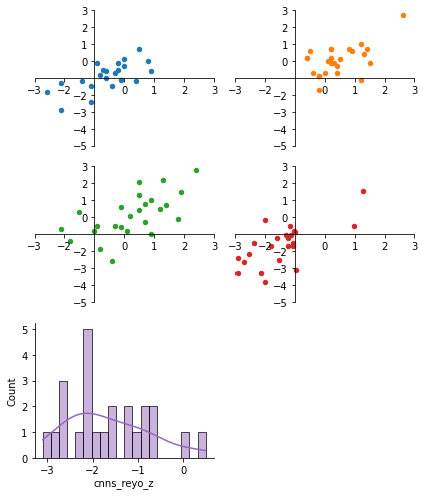

In [12]:
fig,axes = plt.subplots(3,2,figsize = (6,7))

PALETTE = 'tab10'
plot_colors = sbn.color_palette(PALETTE, 5)

COMMON_SCATTER_KWS = {'s' : 20}

plot_domain_tests('motor skills', DOMAIN_TESTS, impaired_w_seq, axes[0,0], c = plot_colors[0], **COMMON_SCATTER_KWS)
plot_domain_tests('processing speed/executive function', DOMAIN_TESTS, impaired_w_seq, axes[0,1], c = plot_colors[1], **COMMON_SCATTER_KWS)
plot_domain_tests('verbal fluency', DOMAIN_TESTS, impaired_w_seq, axes[1,0], c = plot_colors[2], **COMMON_SCATTER_KWS)
plot_domain_tests('episodic memory', DOMAIN_TESTS, impaired_w_seq, axes[1,1], c = plot_colors[3], **COMMON_SCATTER_KWS)

sbn.histplot(impaired_w_seq['cnns_reyo_z'], kde = True, bins = 20, ax = axes[2,0], color = plot_colors[4])
#axes[2,0].set_title('visuoconstruction')

axes[2,1].set_visible(False)

plt.tight_layout()

sbn.despine()

plt.savefig("ParticipantsNeuroScoresWithPairedTats.png", dpi = 300, bbox_inches = 'tight')

In [24]:
IMPAIRMENT_THRESHOLD = -1
impaired_w_seq_bool = (impaired_w_seq[IMPAIRMENT_TESTS] <= IMPAIRMENT_THRESHOLD).applymap(int)

In [51]:
# Prior frame array
prior_values = impaired_w_seq_bool.mean()
prior_values = prior_values[prior_values!=0].to_frame()
prior_values[1] = 1 - prior_values[0]

prior_values.columns = [1,0]
prior_values

,1,0
groovedpegdom_heaton_z,0.28,0.72
groovedpegnondom_heaton_z,0.40,0.60
trailb_heaton_z,0.08,0.92
categoryfluency_total_heaton_z,0.16,0.84
letterfluencyfas_total_heaton_z,0.16,0.84
cnns_reyo_z,0.72,0.28
bvmt_immediate_heaton_z,0.84,0.16
bvmt_delay_heaton_z,0.76,0.24


In [53]:
# Calculates proportion of interacting tats across all available sequences
# regardless of whether they have a paired domain score
average_interaction_likelihood = pd.Series(interactions.values()).mean()
average_interaction_likelihoods = pd.Series([1 - average_interaction_likelihood, average_interaction_likelihood], index = [0,1])
average_interaction_likelihoods

0    0.807432
1    0.192568
dtype: float64

In [108]:
# Only used to find Patient IDs that are not PacBio sequenced
# non_included_seqs = set(neuro.index).difference(set(patient_tats.keys()))
# non_included_seqs

In [317]:
# Format is:
#              | Tat non_int | Tat int |
#              |-------------|---------| 
# Impaired     |             |         |
#              |-------------|---------|
# Non-impaired |             |         |
#              |-------------|---------|

col_means = np.expand_dims(average_interaction_likelihoods, 0)
row_means = np.expand_dims(prior_values.loc['groovedpegdom_heaton_z',:], 1)

col_means * row_means * 25

array([[ 5.65202703,  1.34797297],
       [14.53378378,  3.46621622]])

In [126]:
patient_tat_interacts = impaired_w_seq_bool.index.map(lambda x: interactions_patient[x])

impaired_w_seq_bool.loc[:,'tat_interacts'] = patient_tat_interacts
impaired_w_seq_bool

,groovedpegdom_heaton_z,groovedpegnondom_heaton_z,traila_heaton_z,trailb_heaton_z,categoryfluency_total_heaton_z,letterfluencyfas_total_heaton_z,cnns_reyo_z,bvmt_immediate_heaton_z,bvmt_delay_heaton_z,tat_interacts
study_id,,,,,,,,,,
2,0,0,0,1,0,0,1,0,1,0
5,0,0,0,0,0,0,0,1,1,0
13,1,0,0,0,0,0,1,1,1,0
25,0,0,0,0,0,1,0,1,1,0
26,0,0,0,0,0,0,0,1,1,1
38,1,1,0,0,0,0,1,1,1,0
44,0,1,0,0,1,1,0,1,1,0
46,0,0,0,0,0,0,0,1,0,1
68,0,0,0,1,0,0,1,1,1,1


In [183]:
tat_interacts_w_impaired_domains = impaired_w_seq_bool.groupby("tat_interacts").sum().T

# Assert that the order of columns is equivalent to order of mean
print(f"""Domain average impairment order is equivalent to paired tat interactrion table order: {(tat_interacts_w_impaired_domains.index == average_impairment_accurances.index).all()}
Tat interaction likelihood order is equivalent to paired tat interaction-impairment table order: {(tat_interacts_w_impaired_domains.columns == average_interaction_likelihoods.index).all()}""")

Domain average impairment order is equivalent to paired tat interactrion table order: True
Tat interaction likelihood order is equivalent to paired tat interaction-impairment table order: True


In [113]:
class PriorKnowledgeChisquaredTester(object):
    """
    Chisquared test by default assumes that the expected frequencies from each
    sample are the true distribution. This might not be the case, so if we know
    these relative frequencies, they can be applied for a chi-squared test. 
    
    NOTE: Only works w/ contingency tables
    """
    
    def calculate_dof(self, df):
        rows,cols = df.shape
        return (rows-1)*(cols-1)

    def calculate_expected_value_w_prior_knowledge(self, df : pd.DataFrame, expected_col_values : np.ndarray , expected_rows_values :  np.ndarray):
        assert expected_col_values.shape[0] == 1, f"Column mean shape must be end w/ 1. Recieved shape: {expected_col_values.shape}"
        assert expected_rows_values.shape[1] == 1, f"Row mean shape must be end w/ 1. Recieved shape: {expected_col_values.shape}"

        expected_values = expected_rows_values * expected_col_values
        total_entries = np.asarray(df).sum()
        return expected_values * total_entries
    
    def prior_knowledge_chi2_contingency(self, observations : pd.DataFrame, expected_col_values : np.ndarray , expected_rows_values :  np.ndarray):
        dof = self.calculate_dof(observations)
        expected_frequencies = self.calculate_expected_value_w_prior_knowledge(observations, expected_col_values, expected_rows_values)
        
        chi2, p = power_divergence(observations, expected_frequencies,
                                   ddof = observations.size - 1 - dof, axis=None,
                                   lambda_=1)
        return chi2, p

In [205]:
test_contingency_tables['groovedpegnondom_heaton_z']

tat_interacts,0,1
bvmt_delay_heaton_z,,
1,15,4
0,5,1


In [214]:
tester = PriorKnowledgeChisquaredTester()

test_contingency_tables = dict()
test_p_values = dict()

for test in prior_values.index:
    cross_tab = pd.crosstab(impaired_w_seq_bool[test], impaired_w_seq_bool["tat_interacts"]).loc[[1,0]]
    test_contingency_tables[test] = cross_tab
    
    col_means = np.expand_dims(average_interaction_likelihoods, 0)
    row_means = np.expand_dims(prior_values.loc[test,:], 1)
    
    _, p = tester.prior_knowledge_chi2_contingency(cross_tab, col_means, row_means)
    test_p_values[test] = p
    
#tester.prior_knowledge_chi2_contingency()

In [221]:
from statsmodels.stats.multitest import multipletests

_, adjusted_p_values, _, _ = multipletests(list(test_p_values.values()), method = 'bonferroni')

test_adjusted_p_values = dict(zip(prior_values.index,list(adjusted_p_values)))

for test in prior_values.index:
    print(f"""{test} | original p: {round(test_p_values[test],3)} | bonferroni-adjusted p: {round(test_adjusted_p_values[test],3)}
---""")

groovedpegdom_heaton_z | original p: 0.113 | bonferroni-adjusted p: 0.905
---
groovedpegnondom_heaton_z | original p: 0.038 | bonferroni-adjusted p: 0.306
---
trailb_heaton_z | original p: 0.26 | bonferroni-adjusted p: 1.0
---
categoryfluency_total_heaton_z | original p: 0.267 | bonferroni-adjusted p: 1.0
---
letterfluencyfas_total_heaton_z | original p: 0.267 | bonferroni-adjusted p: 1.0
---
cnns_reyo_z | original p: 0.494 | bonferroni-adjusted p: 1.0
---
bvmt_immediate_heaton_z | original p: 0.267 | bonferroni-adjusted p: 1.0
---
bvmt_delay_heaton_z | original p: 0.798 | bonferroni-adjusted p: 1.0
---


In [222]:
def plot_contigency_table(contingency_table, ax, **kwargs):
    sbn.heatmap(contingency_table, ax = ax, **kwargs)

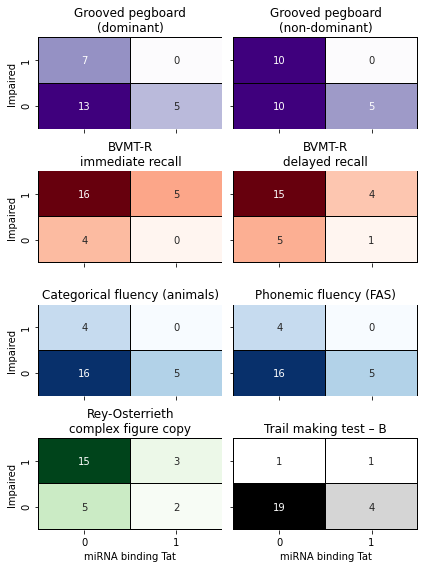

In [314]:
fig,axes = plt.subplots(4,2,figsize = (6,8), sharex = True, sharey = True)

PALETTE = "Purples"

common_kwargs = {'cbar' : False,  'annot':True, 'cbar_kws' : {'label' : 'Count'}, 'linewidth' : 0.01, 'linecolor' : 'k'}

# Motor skills
plot_contigency_table(test_contingency_tables['groovedpegdom_heaton_z'], axes[0,0], cmap = PALETTE, **common_kwargs)
axes[0,0].set_title('Grooved pegboard\n(dominant)')

plot_contigency_table(test_contingency_tables['groovedpegnondom_heaton_z'], axes[0,1], cmap = PALETTE,  **common_kwargs)
axes[0,1].set_title('Grooved pegboard\n(non-dominant)')

# episodic memory
plot_contigency_table(test_contingency_tables['bvmt_immediate_heaton_z'], axes[1,0], cmap = "Reds",  **common_kwargs)
axes[1,0].set_title('BVMT-R\nimmediate recall')

plot_contigency_table(test_contingency_tables['bvmt_delay_heaton_z'], axes[1,1], cmap = "Reds",  **common_kwargs)
axes[1,1].set_title('BVMT-R\ndelayed recall')

# verbal fluency
plot_contigency_table(test_contingency_tables['categoryfluency_total_heaton_z'], axes[2,0], cmap = "Blues", **common_kwargs)
axes[2,0].set_title('Categorical fluency (animals)')

plot_contigency_table(test_contingency_tables['letterfluencyfas_total_heaton_z'], axes[2,1], cmap = "Blues",  **common_kwargs)
axes[2,1].set_title('Phonemic fluency (FAS)')

# visuoconstruction
plot_contigency_table(test_contingency_tables['cnns_reyo_z'], axes[3,0], cmap = "Greens",  **common_kwargs)
axes[3,0].set_title('Rey-Osterrieth\ncomplex figure copy')

# processing speed/executive function
plot_contigency_table(test_contingency_tables['trailb_heaton_z'], axes[3,1], cmap = "gist_gray_r",  **common_kwargs)
axes[3,1].set_title('Trail making test – B')

for ax in axes.flat:
    ax.set_ylabel("")
    ax.set_xlabel("")

for i,j in [[0,0],[1,0],[2,0],[3,0]]:
    axes[i,j].set_ylabel("Impaired")
    #axes[i,j].set_yticklabels(['Impaired','Nonimpaired'], roation)

for i,j in [[3,0],[3,1]]:
    axes[i,j].set_xlabel("miRNA binding Tat")
    
plt.tight_layout()
plt.savefig("ChiSquareFigure.png", dpi = 300)

# Chi-squared Example

In [115]:
# This matches the wiki example
data = np.array([[90,60,104,95],[30 ,50 ,51 ,20],[30 ,40 ,45 ,35]])
obs = pd.DataFrame(data, columns = ['A','B','C','D'], index = ['White','Blue','No'])
display(obs)

chi2, p, dof, ex = chi2_contingency(obs, correction=False)
chi2, p

,A,B,C,D
White,90,60,104,95
Blue,30,50,51,20
No,30,40,45,35


(24.5712028585826, 0.0004098425861096696)

In [116]:
col_means = np.expand_dims(obs.sum(axis=0) / np.asarray(obs).sum(), 0)
row_means = np.expand_dims(obs.sum(axis=1) / np.asarray(obs).sum(), 1)

tester = PriorKnowledgeChisquaredTester()
tester.prior_knowledge_chi2_contingency(data, col_means, row_means)

(24.571202858582595, 0.0004098425861096704)

In [117]:
dof = (obs.shape[0] - 1) * (obs.shape[1] - 1)

chi2, p = power_divergence(obs, expected,
                           ddof = obs.size - 1 - dof, axis=None,
                           lambda_=1)
p

0.0004098425861096704

<AxesSubplot:>

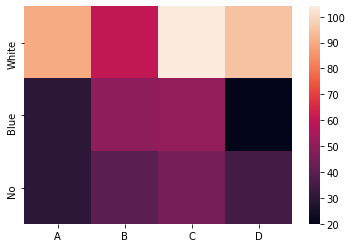

In [118]:
import seaborn as sbn
sbn.heatmap(obs)